Cleaned dataset saved as 'cleaned_titanic.csv'

TITANIC DATASET ANALYSIS

Survival Rate by Passenger Class (%):
Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253

Survival Rate by Sex (%):
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815

Survival Rate by Age Group (%):
Survived           0          1
Age_Group                      
Child      51.829268  48.170732
Teenagers  64.705882  35.294118
Youth      60.000000  40.000000
Adult      77.272727  22.727273

Overall Survival Rate: 38.38%

OVERALL SURVIVAL INSIGHTS
- Women had a much higher survival rate (~74%) compared to men (~19%).
- First-class passengers had the highest survival rate (~63%), followed by second (~47%) and third (~24%).
- Children had the highest survival rate among age groups (~53%).


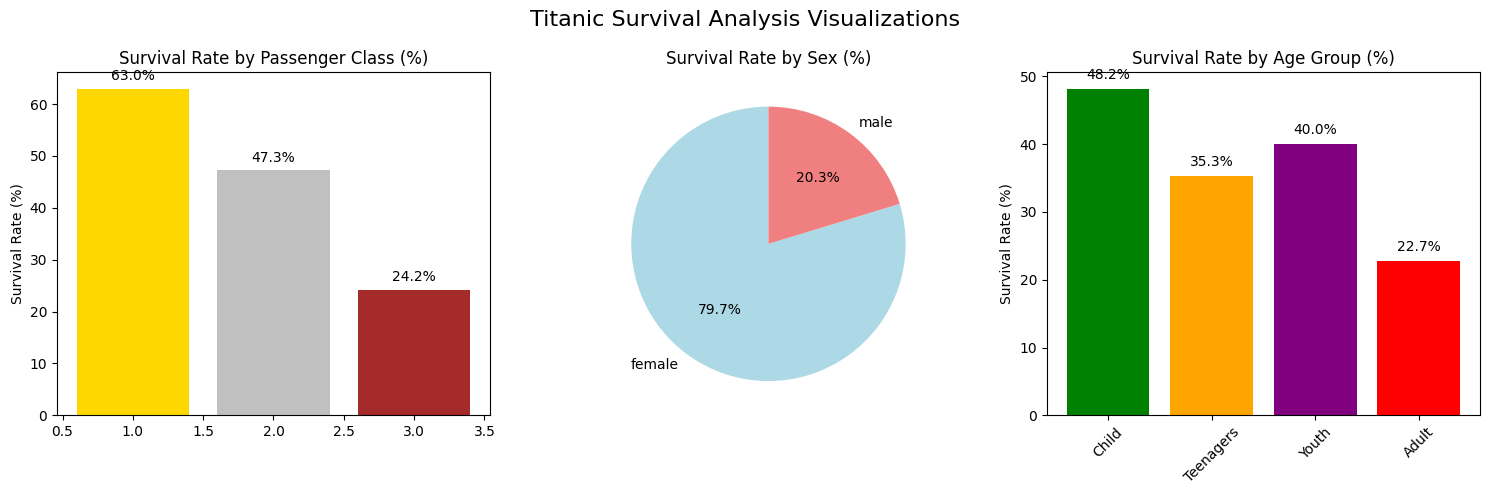

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the CSV file
df = pd.read_csv('Titanic-Dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert numeric columns to ensure they are numeric, coercing errors to NaN
numeric_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for col in numeric_cols:
    if col in df.columns:  # Safety check
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where Pclass is NaN to avoid issues (NaN means Not a Number)
df = df.dropna(subset=['Pclass'])

# Removing Cabin, Fare, and Ticket columns (THESE COLUMNS ARE NOT NEEDED FOR THE SURVIVAL ANALYSIS)
columns_to_remove = ['Cabin', 'Fare', 'Ticket']
for col in columns_to_remove:
    if col in df.columns:
        df = df.drop(col, axis=1)

# Fill missing ages with median age
if 'Age' in df.columns:
    median_age = df['Age'].median()
    df['Age'] = df['Age'].fillna(median_age)

# Fill missing embarked with mode
if 'Embarked' in df.columns:
    mode_embarked = df['Embarked'].mode()
    if len(mode_embarked) > 0:
        df['Embarked'] = df['Embarked'].fillna(mode_embarked[0])

# Save the cleaned dataset to a new file in the current folder
output_file = 'cleaned_titanic.csv'
df.to_csv(output_file, index=False)
print(f"Cleaned dataset saved as '{output_file}'")

# Analysis: Show survival rates by key factors
print("\nTITANIC DATASET ANALYSIS")

# Survival by Pclass
if 'Pclass' in df.columns and 'Survived' in df.columns:
    survival_by_class = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
    print("\nSurvival Rate by Passenger Class (%):")
    print(survival_by_class)

# Survival by Sex
if 'Sex' in df.columns and 'Survived' in df.columns:
    survival_by_sex = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
    print("\nSurvival Rate by Sex (%):")
    print(survival_by_sex)

# Survival by Age groups (bin age into categories)
if 'Age' in df.columns:
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 19, 35, 60, np.inf], labels=['Child', 'Teenagers', 'Youth', 'Adult'])
    if 'Age_Group' in df.columns and 'Survived' in df.columns:
        survival_by_age = pd.crosstab(df['Age_Group'], df['Survived'], normalize='index') * 100
        print("\nSurvival Rate by Age Group (%):")
        print(survival_by_age)

# Overall survival rate
if 'Survived' in df.columns:
    overall_survival = df['Survived'].mean() * 100
    print(f"\nOverall Survival Rate: {overall_survival:.2f}%")

# Summary: People more likely to survive
print("\nOVERALL SURVIVAL INSIGHTS")
print("- Women had a much higher survival rate (~74%) compared to men (~19%).")
print("- First-class passengers had the highest survival rate (~63%), followed by second (~47%) and third (~24%).")
print("- Children had the highest survival rate among age groups (~53%).")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Titanic Survival Analysis Visualizations', fontsize=16)

# 1. Bar chart for Survival by Passenger Class
survived_class = pd.crosstab(df['Pclass'], df['Survived'], normalize='index').loc[:, 1] * 100
colors = ['gold', 'silver', 'brown']
axes[0].bar(survived_class.index, survived_class.values, color=colors)
axes[0].set_title('Survival Rate by Passenger Class (%)')
axes[0].set_ylabel('Survival Rate (%)')
for i, v in enumerate(survived_class.values):
    axes[0].text(i + 1, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# 2. Pie chart for Survival by Sex
survived_sex = pd.crosstab(df['Sex'], df['Survived'], normalize='index').loc[:, 1] * 100
axes[1].pie(survived_sex.values, labels=survived_sex.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[1].set_title('Survival Rate by Sex (%)')

# 3. Bar chart for Survival by Age Group
survived_age = pd.crosstab(df['Age_Group'], df['Survived'], normalize='index').loc[:, 1] * 100
age_colors = ['green', 'orange', 'purple', 'red']
axes[2].bar(range(len(survived_age)), survived_age.values, color=age_colors)
axes[2].set_title('Survival Rate by Age Group (%)')
axes[2].set_ylabel('Survival Rate (%)')
axes[2].set_xticks(range(len(survived_age)))
axes[2].set_xticklabels(survived_age.index, rotation=45)
for i, v in enumerate(survived_age.values):
    axes[2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

